In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('iris')
df.shape

(150, 5)

In [4]:
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [5]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [6]:
df.species.nunique()

3

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
import numpy as np
df.describe(include=[np.number])

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.describe(include=[np.object])


/tmp/ipykernel_82897/476131807.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,species
count,150
unique,3
top,setosa
freq,50


In [10]:
df.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
df = pd.DataFrame(
{"a" : [np.nan, 5, 6],
"b" : [7, np.nan, 9],
"c" : [np.nan, 11, np.nan]},
index = [1, 2, 3])

In [12]:
df

,a,b,c
1,NaN,7.0,NaN
2,5.0,NaN,11.0
3,6.0,9.0,NaN


In [13]:
df.dropna(axis=0, how='all')

,a,b,c
1,NaN,7.0,NaN
2,5.0,NaN,11.0
3,6.0,9.0,NaN


In [14]:
df.dropna(axis=0, how='any')

,a,b,c


In [15]:
df.fillna(0.0)

,a,b,c
1,0.0,7.0,0.0
2,5.0,0.0,11.0
3,6.0,9.0,0.0


In [16]:
df.fillna(value={'a':0, 'b':1, 'c':2})

,a,b,c
1,0.0,7.0,2.0
2,5.0,1.0,11.0
3,6.0,9.0,2.0


In [17]:
df = pd.DataFrame(
    {'a':range(1,11), 'b':np.random.randn(10)}
)

In [18]:
df

,a,b
0,1,0.686298
1,2,-0.422575
2,3,-0.641989
3,4,-0.329379
4,5,-0.810690
5,6,-0.225407
6,7,1.003297
7,8,-0.015079
8,9,1.452095
9,10,0.440408


In [19]:
df.assign(ln_b=lambda row: np.log(row.a))

,a,b,ln_b
0,1,0.686298,0.000000
1,2,-0.422575,0.693147
2,3,-0.641989,1.098612
3,4,-0.329379,1.386294
4,5,-0.810690,1.609438
5,6,-0.225407,1.791759
6,7,1.003297,1.945910
7,8,-0.015079,2.079442
8,9,1.452095,2.197225
9,10,0.440408,2.302585


In [20]:
pd.qcut(df.b, 3, labels=['bigger', 'medium', 'smaller'])

0    smaller
1     bigger
2     bigger
3     bigger
4     bigger
5     medium
6    smaller
7     medium
8    smaller
9     medium
Name: b, dtype: category
Categories (3, object): ['bigger' < 'medium' < 'smaller']

In [21]:
df.clip(lower=-0.5, upper=0.3)

,a,b
0,0.3,0.300000
1,0.3,-0.422575
2,0.3,-0.500000
3,0.3,-0.329379
4,0.3,-0.500000
5,0.3,-0.225407
6,0.3,0.300000
7,0.3,-0.015079
8,0.3,0.300000
9,0.3,0.300000


In [22]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [23]:
df.rename(columns={'origin': 'k'})

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,k,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [24]:
df = pd.DataFrame(
{"a" : [4, 5, 6],
"b" : [7, 8, 9],
"c" : [10, 11, 12]},
index = [1, 2, 3])
df

,a,b,c
1,4,7,10
2,5,8,11
3,6,9,12


In [25]:
df2 = pd.melt(df).assign(idx=lambda row: row.index%3)
df2

,variable,value,idx
0,a,4,0
1,a,5,1
2,a,6,2
3,b,7,0
4,b,8,1
5,b,9,2
6,c,10,0
7,c,11,1
8,c,12,2


In [26]:
df2.pivot(index='idx', columns='variable', values='value')

variable,a,b,c
idx,,,
0,4,7,10
1,5,8,11
2,6,9,12


In [27]:
df = sns.load_dataset('mpg')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [28]:
df.groupby(by='origin').apply(list)

origin
europe    [mpg, cylinders, displacement, horsepower, wei...
japan     [mpg, cylinders, displacement, horsepower, wei...
usa       [mpg, cylinders, displacement, horsepower, wei...
dtype: object

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [30]:
df.shift(1).head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,usa,chevrolet chevelle malibu
2,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,usa,buick skylark 320
3,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,usa,plymouth satellite
4,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,usa,amc rebel sst


In [31]:
s = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
s

2000-01-01    0.656627
2000-01-02    1.440110
2000-01-03    1.038528
2000-01-04    0.249355
2000-01-05    0.344760
                ...   
2002-09-22   -0.601377
2002-09-23    2.249615
2002-09-24    0.320443
2002-09-25    0.145259
2002-09-26    0.213909
Freq: D, Length: 1000, dtype: float64

In [32]:
[i for i in dir(s.rolling(window=10)) if not i.startswith('_')]

['agg',
 'aggregate',
 'apply',
 'axis',
 'center',
 'closed',
 'corr',
 'count',
 'cov',
 'exclusions',
 'is_datetimelike',
 'kurt',
 'max',
 'mean',
 'median',
 'method',
 'min',
 'min_periods',
 'ndim',
 'obj',
 'on',
 'quantile',
 'rank',
 'sem',
 'skew',
 'std',
 'sum',
 'validate',
 'var',
 'win_type',
 'window']

In [33]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [34]:
df3 = df[['horsepower', 'displacement', 'acceleration']]
df3.acceleration *= 10
df3

/tmp/ipykernel_82897/99720350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.acceleration *= 10


,horsepower,displacement,acceleration
0,130.0,307.0,120.0
1,165.0,350.0,115.0
2,150.0,318.0,110.0
3,150.0,304.0,120.0
4,140.0,302.0,105.0
...,...,...,...
393,86.0,140.0,156.0
394,52.0,97.0,246.0
395,84.0,135.0,116.0
396,79.0,120.0,186.0


<AxesSubplot:>

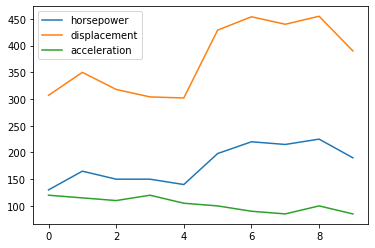

In [35]:
df3.head(10).plot()

<AxesSubplot:ylabel='Frequency'>

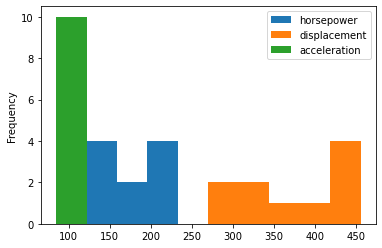

In [36]:
df3.head(10).plot.hist()

In [37]:
df4 = pd.DataFrame(df3.iloc[:, 0])
df4['horsepower_diff'] = df4.diff()
df4

,horsepower,horsepower_diff
0,130.0,NaN
1,165.0,35.0
2,150.0,-15.0
3,150.0,0.0
4,140.0,-10.0
...,...,...
393,86.0,-4.0
394,52.0,-34.0
395,84.0,32.0
396,79.0,-5.0


ValueError: When stacked is True, each column must be either all positive or all negative. Column 'horsepower_diff' contains both positive and negative values

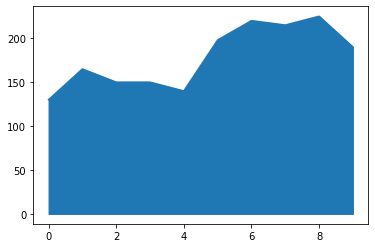

In [40]:
df4.head(10).plot.area()

<AxesSubplot:xlabel='horsepower_diff', ylabel='horsepower'>

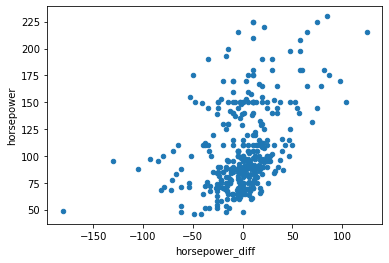

In [42]:
df4.plot.scatter(x='horsepower_diff', y='horsepower')

<AxesSubplot:xlabel='horsepower_diff', ylabel='horsepower'>

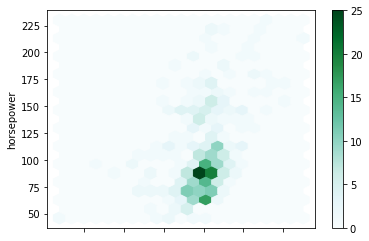

In [45]:
df4.plot.hexbin(x='horsepower_diff', y='horsepower', gridsize=20)


<AxesSubplot:ylabel='horsepower'>

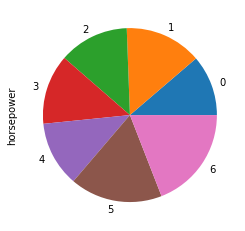

In [49]:
df4.horsepower.head(7).plot.pie()

<AxesSubplot:ylabel='Density'>

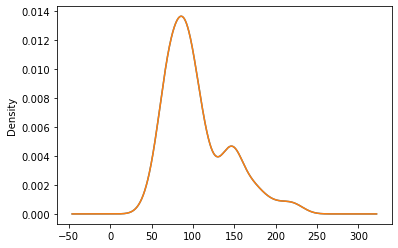

In [51]:
df4.horsepower.plot.density()
df4.horsepower.plot.kde()

In [9]:
import pandas as pd
from IPython.display import display

In [3]:
url = 'http://www.seoul.go.kr/coronaV/coronaStatus.do'

In [4]:
table = pd.read_html(url)
table

[      강남구     강동구     강북구     강서구     관악구     광진구     구로구    금천구     노원구  \
 0  185377  166248  100296  203937  178917  128253  148459  85195  184893   
 1     +85     +50     +14     +84     +78     +42     +42    +20     +57   
 2    서대문구     서초구     성동구     성북구     송파구     양천구    영등포구    용산구     은평구   
 3  108682  142917  107252  156547  236398  158593  148379  74674  162663   
 4     +38     +78     +22     +52     +94     +58     +58    +27     +45   
 
       도봉구    동대문구     동작구     마포구  
 0  110407  126270  143559  133886  
 1     +24     +29     +50     +59  
 2     종로구      중구     중랑구      기타  
 3   48845   44340  136600  223602  
 4     +22     +16     +32    +104  ,
        강남구     강동구     강북구     강서구     관악구     광진구
 0   185377  166248  100296  203937  178917  128253
 1      +85     +50     +14     +84     +78     +42
 2      구로구     금천구     노원구     도봉구    동대문구     동작구
 3   148459   85195  184893  110407  126270  143559
 4      +42     +20     +57     +24     +29     +50
 

In [5]:
len(table)

5

In [10]:
for element in table:
    display(element)

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구
0,185377,166248,100296,203937,178917,128253,148459,85195,184893,110407,126270,143559,133886
1,+85,+50,+14,+84,+78,+42,+42,+20,+57,+24,+29,+50,+59
2,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,기타
3,108682,142917,107252,156547,236398,158593,148379,74674,162663,48845,44340,136600,223602
4,+38,+78,+22,+52,+94,+58,+58,+27,+45,+22,+16,+32,+104


,강남구,강동구,강북구,강서구,관악구,광진구
0,185377,166248,100296,203937,178917,128253
1,+85,+50,+14,+84,+78,+42
2,구로구,금천구,노원구,도봉구,동대문구,동작구
3,148459,85195,184893,110407,126270,143559
4,+42,+20,+57,+24,+29,+50
5,마포구,서대문구,서초구,성동구,성북구,송파구
6,133886,108682,142917,107252,156547,236398
7,+59,+38,+78,+22,+52,+94
8,양천구,영등포구,용산구,은평구,종로구,중구
9,158593,148379,74674,162663,48845,44340


,구 분,합 계,9세 이하,10세~19세,20세~29세,30세~39세,40세~49세,50세~59세,60세~69세,70세 이상
0,확진자(명),1280,90.0,140.0,282.0,242.0,159.0,164.0,115.0,88.0
1,비율(%),100,7.0,11.0,22.0,18.9,12.4,12.8,9.0,6.9


,일자,일자.1,6.16.,6.15.,6.14.,6.13.,6.12.,6.11.,6.10.
0,총 확진자(A+B),총 확진자(A+B),1280.0,1549.0,1689.0,1763.0,663.0,1159.0,1382.0
1,PCR,검사자,8544.0,7550.0,9491.0,14294.0,4606.0,6961.0,10217.0
2,PCR,확진자(A),320.0,520.0,592.0,444.0,282.0,351.0,412.0
3,PCR,확진율(%),4.2,5.5,4.1,9.6,4.1,3.4,4.6
4,전문가용RAT확진자(B),전문가용RAT확진자(B),960.0,1029.0,1097.0,1319.0,381.0,808.0,970.0


,일,월,화,수,목,금,토
0,NaN,NaN,NaN,"1 3,619,610 (+2,925)","2 3,621,432 (+1,822)","3 3,623,874 (+2,442)","4 3,626,124 (+2,250)"
1,"5 3,627,842 (+1,718)","6 3,628,580 (+738)","7 3,629,532 (+952)","8 3,632,159 (+2,627)","9 3,634,168 (+2,009)","10 3,635,704 (+1,536)","11 3,637,086 (+1,382)"
2,"12 3,638,245 (+1,159)","13 3,638,908 (+663)","14 3,640,671 (+1,763)","15 3,642,360 (+1,689)","16 3,643,909 (+1,549)","17 3,645,189 (+1,280)",18
3,19,20,21,22,23,24,25
4,26,27,28,29,30,NaN,NaN
